In [1]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import re
import nltk
import string

from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import warnings
warnings.filterwarnings('ignore')

from bs4 import BeautifulSoup

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df = pd.read_csv('/kaggle/input/dl-lab-week7/Train.csv')
df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [4]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', "", text)
    text = re.sub('\\W', " ", text)
    text = re.sub(r'\@\w+|\#','', text)
    text = re.sub("https?://\S+|www\.\S+", "", text)
    text = re.sub('<.*?>+', "", text)
    text = re.sub('[%s]' % re.escape(string.punctuation), "", text)
    text = re.sub('\n', "", text)
    text = re.sub('\w*\d\w*', "", text)
    return text

df['text'] = df['text'].apply(preprocess_text)

In [5]:
test_df = pd.read_csv('/kaggle/input/dl-lab-week7/Test.csv')
test_df['text'] = test_df['text'].apply(preprocess_text)

In [6]:
valid_df = pd.read_csv('/kaggle/input/dl-lab-week7/Valid.csv')
valid_df['text'] = valid_df['text'].apply(preprocess_text)

# Tokenization

In [7]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('punkt_tab')

def tokenizer(text):
    tokens = word_tokenize(text)
    return tokens

df['text_tokenize'] = df['text'].apply(tokenizer)
test_df['text_tokenize'] = test_df['text'].apply(tokenizer)
valid_df['text_tokenize'] = valid_df['text'].apply(tokenizer)

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


# StopWord Removal

In [8]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))
stop_words.add("br")

def stopword_removal(text):
    filtered_token = [word for word in text if word not in stop_words]
    return filtered_token

df['text_stopword'] = df['text_tokenize'].apply(stopword_removal)
test_df['text_stopword'] = test_df['text_tokenize'].apply(stopword_removal)
valid_df['text_stopword'] = valid_df['text_tokenize'].apply(stopword_removal)

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Lemmatization

In [10]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data

In [11]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemmatize_words(text):
    lemmatized_token = [lemmatizer.lemmatize(word, pos='v') for word in text]
    return lemmatized_token

df['text_lemmatized'] = df['text_stopword'].apply(lemmatize_words)
test_df['text_lemmatized'] = test_df['text_stopword'].apply(lemmatize_words)
valid_df['text_lemmatized'] = valid_df['text_stopword'].apply(lemmatize_words)

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
df

,text,label,text_tokenize,text_stopword,text_lemmatized
0,i grew up b watching and loving the thunde...,0,"[i, grew, up, b, watching, and, loving, the, t...","[grew, b, watching, loving, thunderbirds, mate...","[grow, b, watch, love, thunderbirds, mat, scho..."
1,when i put this movie in my dvd player and sa...,0,"[when, i, put, this, movie, in, my, dvd, playe...","[put, movie, dvd, player, sat, coke, chips, ex...","[put, movie, dvd, player, sit, coke, chip, exp..."
2,why do people who do not know what a particula...,0,"[why, do, people, who, do, not, know, what, a,...","[people, know, particular, time, past, like, f...","[people, know, particular, time, past, like, f..."
3,even though i have great interest in biblical ...,0,"[even, though, i, have, great, interest, in, b...","[even, though, great, interest, biblical, movi...","[even, though, great, interest, biblical, movi..."
4,im a die hard dads army fan and nothing will e...,1,"[im, a, die, hard, dads, army, fan, and, nothi...","[im, die, hard, dads, army, fan, nothing, ever...","[im, die, hard, dads, army, fan, nothing, ever..."
...,...,...,...,...,...
39995,western union is something of a forgotten cl...,1,"[western, union, is, something, of, a, forgott...","[western, union, something, forgotten, classic...","[western, union, something, forget, classic, w..."
39996,this movie is an incredible piece of work it ...,1,"[this, movie, is, an, incredible, piece, of, w...","[movie, incredible, piece, work, explores, eve...","[movie, incredible, piece, work, explore, ever..."
39997,my wife and i watched this movie because we pl...,0,"[my, wife, and, i, watched, this, movie, becau...","[wife, watched, movie, plan, visit, sicily, st...","[wife, watch, movie, plan, visit, sicily, stro..."
39998,when i first watched flatliners i was amazed ...,1,"[when, i, first, watched, flatliners, i, was, ...","[first, watched, flatliners, amazed, necessary...","[first, watch, flatliners, amaze, necessary, f..."


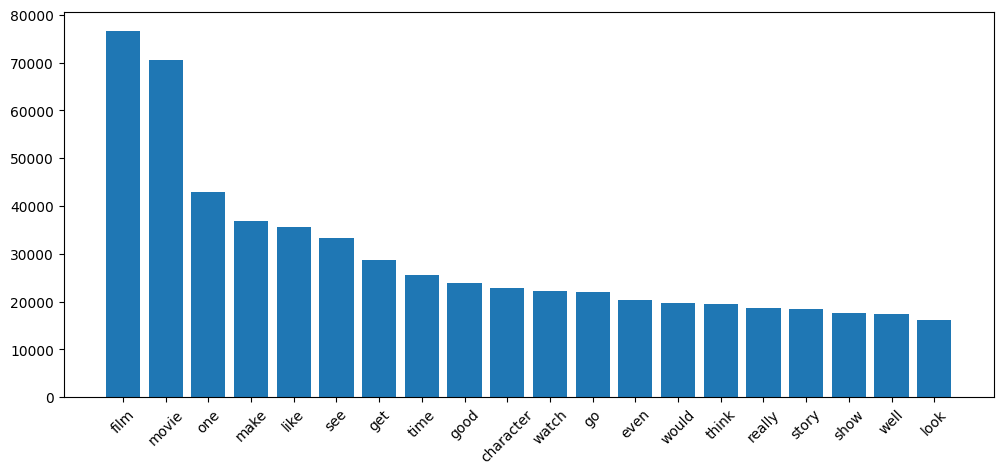

In [13]:
from collections import Counter

word_full_list = np.concatenate(df['text_lemmatized'])

word_freq = Counter(word_full_list)

most_common_word = word_freq.most_common(20)

words = [word[0] for word in most_common_word]
counts = [word[1] for word in most_common_word]

plt.figure(figsize=(12,5))
plt.bar(words,counts)
plt.xticks(rotation=45)
plt.show()

In [14]:
from nltk import bigrams

bigrams = nltk.bigrams(word_full_list)
bigram_freq = Counter(bigrams)
most_common_bigrams = bigram_freq.most_common(20)

bigram_words = [word[0] for word in most_common_bigrams]
bigram_counts = [word[1] for word in most_common_bigrams]

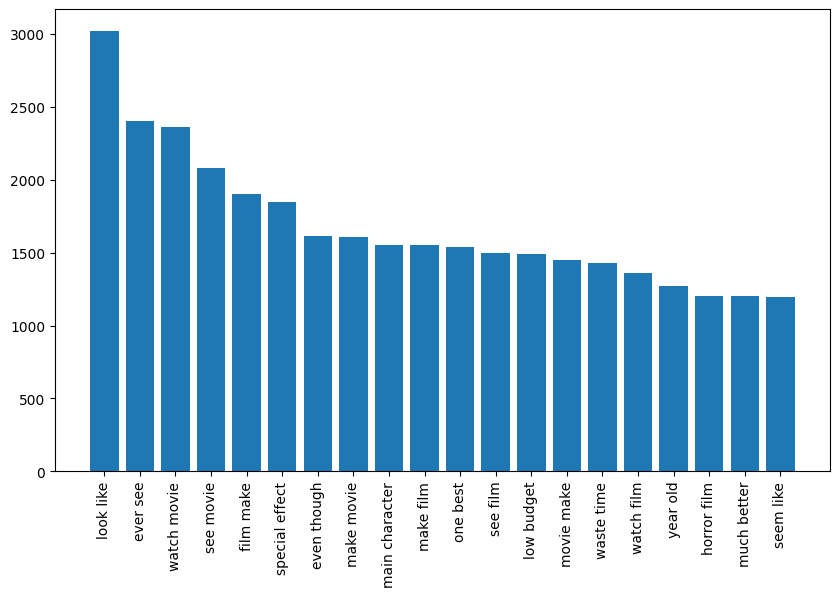

In [15]:
plt.figure(figsize=(10, 6))
plt.bar([f"{w[0]} {w[1]}" for w in bigram_words],bigram_counts)
plt.xticks(rotation=90)
plt.show()

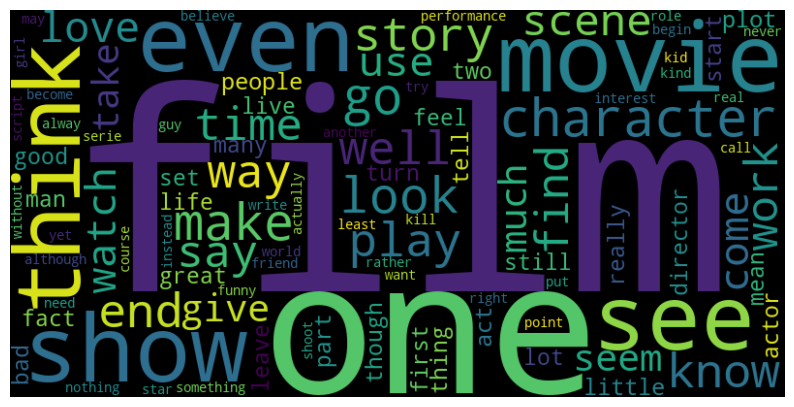

In [16]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, max_words=100).generate(' '.join(word_full_list))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [17]:
positive_word_df = df.loc[df['label']==1,'text_lemmatized']
negative_word_df = df.loc[df['label']==0,'text_lemmatized']

positive_word_list = np.concatenate(positive_word_df.tolist())
negative_word_list = np.concatenate(negative_word_df.tolist())

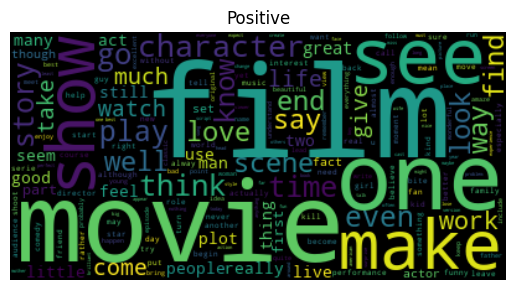

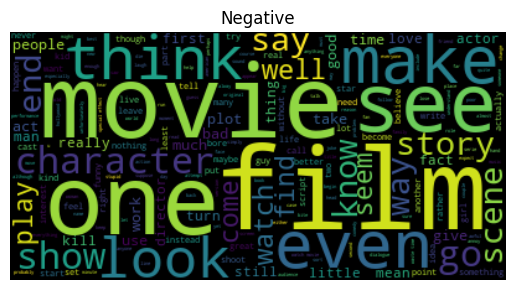

In [18]:
from wordcloud import WordCloud
wordcloud_posi = WordCloud().generate(' '.join(positive_word_list))
wordcloud_negi = WordCloud().generate(' '.join(negative_word_list))

plt.title("Positive")
plt.imshow(wordcloud_posi,interpolation="bilinear")
plt.axis('off')
plt.show()

plt.title("Negative")
plt.imshow(wordcloud_negi,interpolation="bilinear")
plt.axis('off')
plt.show()

In [19]:
from nltk import bigrams
posi_bigrams = bigrams(positive_word_list)
negi_bigrams = bigrams(negative_word_list)

posi_bigram_freq = Counter(posi_bigrams)
posi_most_common = posi_bigram_freq.most_common(20)

negi_bigram_freq = Counter(negi_bigrams)
negi_most_common = negi_bigram_freq.most_common(20)

In [20]:
posi_words = [word[0] for word in posi_most_common]
posi_count = [word[1] for word in posi_most_common]

negi_words = [word[0] for word in negi_most_common]
negi_count = [word[1] for word in negi_most_common]

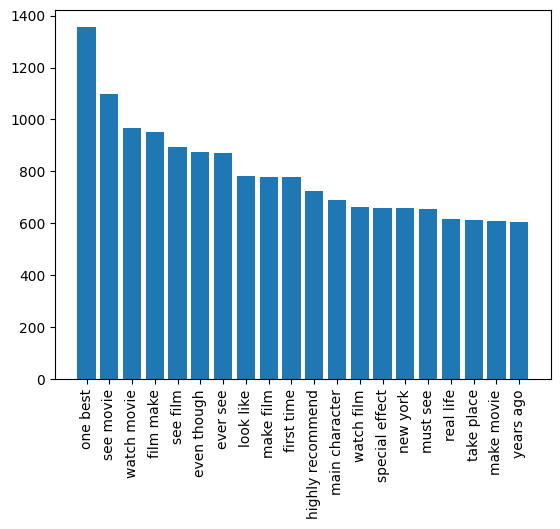

In [21]:
plt.bar([f"{w[0]} {w[1]}" for w in posi_words],posi_count)
plt.xticks(rotation=90)
plt.show()

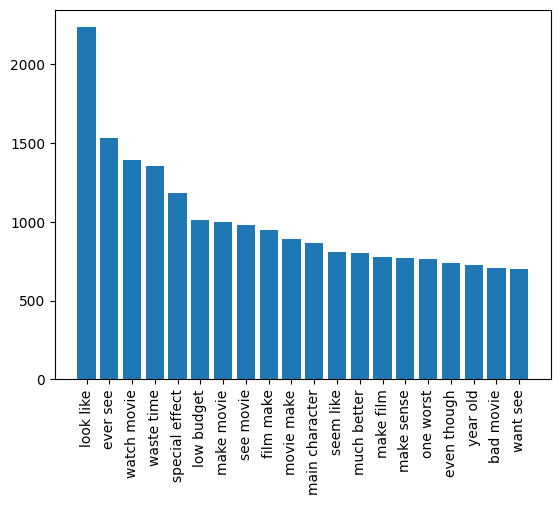

In [22]:
plt.bar([f"{w[0]} {w[1]}" for w in negi_words],negi_count)
plt.xticks(rotation=90)
plt.show()

In [23]:
# Assuming 'train_data' is your DataFrame
df['final_text'] = df['text_lemmatized'].apply(lambda x:' '.join(x))  # Join the list of words into a single string
test_df['final_text'] = test_df['text_lemmatized'].apply(lambda x: ' '.join(x))
valid_df['final_text'] = valid_df['text_lemmatized'].apply(lambda x: ' '.join(x))

In [24]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_vocab_size = 10000
max_sequence_length = 200
output_dim=128

tokenizer = Tokenizer()

tokenizer.fit_on_texts(df['final_text'])
train_seq = tokenizer.texts_to_sequences(df['final_text'])
x_train = pad_sequences(train_seq, maxlen=max_sequence_length, padding='post', truncating='post')

y_train = df['label']

In [25]:
x_train.shape
y_train.shape

(40000,)

In [26]:
#model 1: 3-Layer LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding

model_lstm = Sequential([
    Embedding(input_dim=max_vocab_size,output_dim=output_dim,input_length=max_sequence_length),
    LSTM(128, return_sequences=True),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dense(1, activation='sigmoid')
])

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
#model 2: 3-Layer GRU
from tensorflow.keras.layers import GRU

model_gru = Sequential([
    Embedding(input_dim=max_vocab_size,output_dim=output_dim,input_length=max_sequence_length),
    GRU(128, return_sequences=True),
    GRU(64, return_sequences=True),
    GRU(32),
    Dense(1, activation='sigmoid')
])

model_gru.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
#model 3: 4-Layer Bidirectional LSTM
from tensorflow.keras.layers import Bidirectional

model_bilstm = Sequential([
    Embedding(input_dim=max_vocab_size,output_dim=output_dim,input_length=max_sequence_length),
    Bidirectional(LSTM(128, return_sequences=True)),
    Bidirectional(LSTM(64, return_sequences=True)),
    Bidirectional(LSTM(32)),
    Dense(1, activation='sigmoid')
])

model_bilstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#plot accuracy curves
import matplotlib.pyplot as plt

history_lstm = model_lstm.fit(x_train, y_train, epochs=5, validation_split=0.2)
history_gru = model_gru.fit(x_train, y_train, epochs=5, validation_split=0.2)
history_bilstm = model_bilstm.fit(x_train, y_train, epochs=5, validation_split=0.2)

plt.plot(history_lstm.history['accuracy'], label='LSTM')
plt.plot(history_gru.history['accuracy'], label='GRU')
plt.plot(history_bilstm.history['accuracy'], label='BiLSTM')
plt.legend()
plt.title('Model Accuracy Comparison')
plt.show()

Epoch 1/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 39s 35ms/step - accuracy: 0.5206 - loss: 0.6906 - val_accuracy: 0.6054 - val_loss: 0.6686
Epoch 2/5
 989/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5661 - loss: 0.6763